In [1]:
import cv2
import numpy as np
import copy
import random
import sys
import matplotlib.pyplot as plt
%matplotlib inline


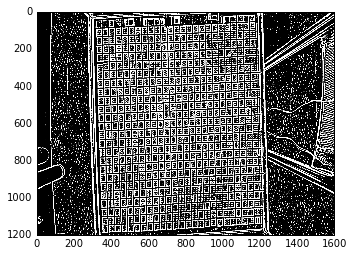

In [3]:
img = cv2.imread('./save/1_before_image.png')
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
lego_preprocessed = cv2.GaussianBlur(gray_img, (5, 5), 0)
# _, lego_binary = cv2.threshold(img,135,255,cv2.THRESH_BINARY)
lego_binary = cv2.adaptiveThreshold(lego_preprocessed, 255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2) 
lego_binary = cv2.bitwise_not(lego_binary)
plt.imshow(lego_binary, cmap='gray')

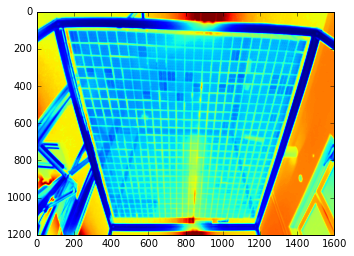

In [57]:
preprocessed_g = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img_blur_small = cv2.GaussianBlur(preprocessed_g, (17,17), 0)
plt.imshow(img_blur_small)

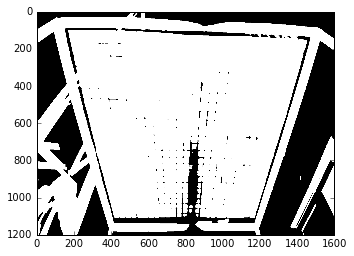

In [64]:
 _, lego_p_binary = cv2.threshold(img_blur_small,140,255,cv2.THRESH_BINARY)
# lego_p_binary = cv2.adaptiveThreshold(img_blur_small, 255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2) 
lego_p_binary = cv2.bitwise_not(lego_p_binary)
plt.imshow(lego_p_binary, cmap='gray')

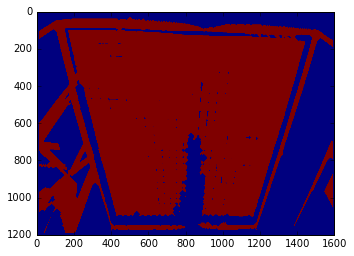

In [83]:
# lego_p_contours = cv2.findContours(lego_p_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
im2, contours, hierarchy = cv2.findContours(lego_p_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

plt.imshow(cv2.drawContours(lego_p_binary, contours[0], -1, (0, 0, 255), 3))


In [68]:
print(lego_p_contours)

(array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ..., 
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0]], dtype=uint8), [array([[[ 116, 1198]],

       [[ 116, 1199]]], dtype=int32), array([[[ 860, 1086]],

       [[ 859, 1087]],

       [[ 857, 1087]],

       [[ 856, 1088]],

       [[ 854, 1088]],

       [[ 853, 1089]],

       [[ 853, 1093]],

       [[ 857, 1097]],

       [[ 857, 1098]],

       [[ 858, 1099]],

       [[ 858, 1100]],

       [[ 859, 1100]],

       [[ 860, 1101]],

       [[ 864, 1101]],

       [[ 865, 1100]],

       [[ 865, 1096]],

       [[ 866, 1095]],

       [[ 866, 1088]],

       [[ 864, 1086]]], dtype=int32), array([[[ 790, 1085]],

       [[ 789, 1086]],

       [[ 788, 1086]],

       [[ 786, 1088]],

       [[ 786, 1099]],

       [[ 787, 1100]],

       [[ 787, 1101]],

      

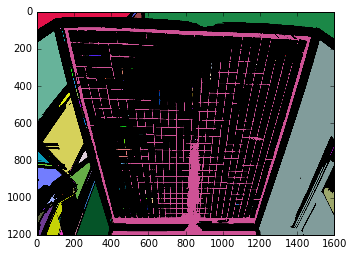

In [7]:
src = cv2.imread("lego_square.png", cv2.IMREAD_COLOR)

if src is None:
    
    print("Failed to load image file.")
    sys.exit(1)

height, width, channels = src.shape[:3]
dst = copy.copy(src)
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
ret, bina = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
nLabels, labelImage = cv2.connectedComponents(bina)

colors = []
for i in range(1, nLabels + 1):
    colors.append(np.array([random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)]))

for y in range(0, height):
    for x in range(0, width):
        if labelImage[y, x] > 0:
            dst[y, x] = colors[labelImage[y, x]]
        else:
            dst[y, x] = [0, 0, 0]

plt.imshow(dst)
# cv2.namedWindow("Source", cv2.WINDOW_AUTOSIZE)
# cv2.imshow("Source", src)
# cv2.namedWindow("Connected Components", cv2.WINDOW_AUTOSIZE)
# cv2.imshow("Connected Components", dst)

cv2.waitKey(0)
cv2.destroyAllWindows()